# Business Analysis: Supplement Sales Forecast
[#TimeSeries](#) [#Commerce](#) [#EDA](#)

## Description
Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level. Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

## Data Profiling
- ID (String): Order Unique Identity.
- Store_id (Integer): Id to represent womart store entity.
- Store_Type (String): Type of store based on womart business strategic.
- Location_Type (String): Type of location of each store.
- Region_Code (String): Id of region where each store located.
- Date (String): Day when transaction occurs on each store.
- Holiday (Integer): Is it holiday or not.
- Discount (String): it has a discount or not.
- #Order (Integer): Number of orders.
- Sales (Float): Total revenue of each order.

## Import Necessary Python Library 

In [1]:
# Load necessary modules
import warnings
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline

## Load Dataset into Dataframe

In [2]:
master_df = pd.read_csv(
    'https://github.com/mmirzafahmi/python_ds_project/raw/master/data/train.csv.zip', 
    compression='zip'
)

## View Data Samples

In [3]:
master_df.sample(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
133761,T1133762,286,S4,L2,R4,2019-01-02,0,Yes,135,102126.00
177714,T1177715,219,S4,L2,R1,2019-05-02,0,Yes,197,115311.00
172818,T1172819,332,S2,L5,R1,2019-04-19,1,Yes,57,34166.88
52836,T1052837,107,S1,L3,R3,2018-05-25,0,No,21,14199.00
4498,T1004499,60,S1,L5,R2,2018-01-13,0,Yes,62,41100.00


## View Data Summary

In [4]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


## Remove Duplicates

In [3]:
# Remove feature with high cardinality and drop duplicates
master_df.drop('ID', axis=1, inplace=True)
master_df.drop_duplicates(inplace=True)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store_id       188340 non-null  int64  
 1   Store_Type     188340 non-null  object 
 2   Location_Type  188340 non-null  object 
 3   Region_Code    188340 non-null  object 
 4   Date           188340 non-null  object 
 5   Holiday        188340 non-null  int64  
 6   Discount       188340 non-null  object 
 7   #Order         188340 non-null  int64  
 8   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 14.4+ MB


## View Statistical Summary

In [4]:
from IPython.display import display, HTML

def describe_categorical(df, cols):

    """
    Since our dataframe contains categorical features with various type of data, 
    this small function task will transform the numerical form of categorical columns into 
    string, in order to make .describe() can compute its statistical elements the dataframe  
    correctly.
    
    :param df: pandas dataframe
    :param cols: list of categorical features
    :return pandas dataframe
    """
    return df[cols].astype('category').describe()


nums = ['#Order', 'Sales']
cats = ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount']

display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Numerical Features</h5></b></center>'))
display(master_df[nums].describe())

display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Categorical Features</h5></b></center>'))
describe_categorical(master_df, cats)

,#Order,Sales
count,188340.000000,188340.000000
mean,68.205692,42784.327982
std,30.467415,18456.708302
min,0.000000,0.000000
25%,48.000000,30426.000000
50%,63.000000,39678.000000
75%,82.000000,51909.000000
max,371.000000,247215.000000


,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
count,188340,188340,188340,188340,188340,188340
unique,365,4,5,4,2,2
top,1,S1,L1,R1,0,No
freq,516,88752,85140,63984,163520,104051


# Univariate Analysis

### View Data Outlier

<Axes: ylabel='Sales'>

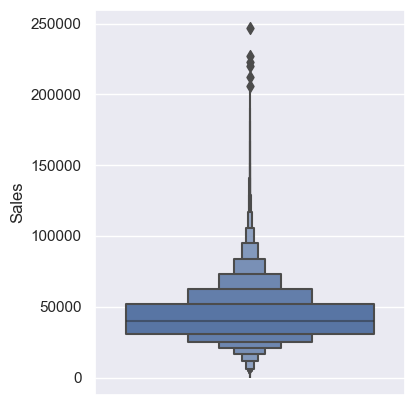

In [19]:
sns.set(rc={'figure.figsize':(4, 5)})
sns.boxenplot(y=master_df['Sales'])

<Axes: ylabel='#Order'>

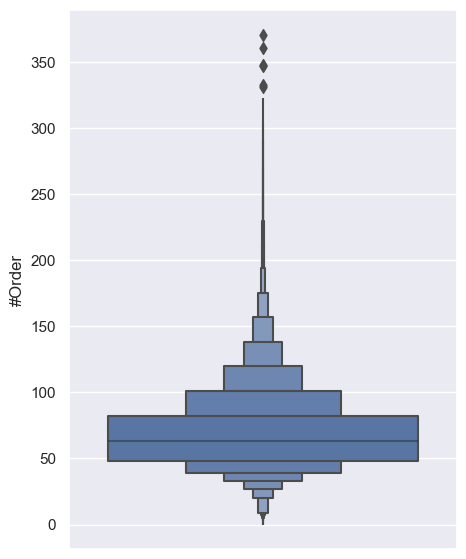

In [11]:
sns.boxenplot(y=master_df['#Order'])

### View Data Distribution

<Axes: xlabel='Sales', ylabel='Count'>

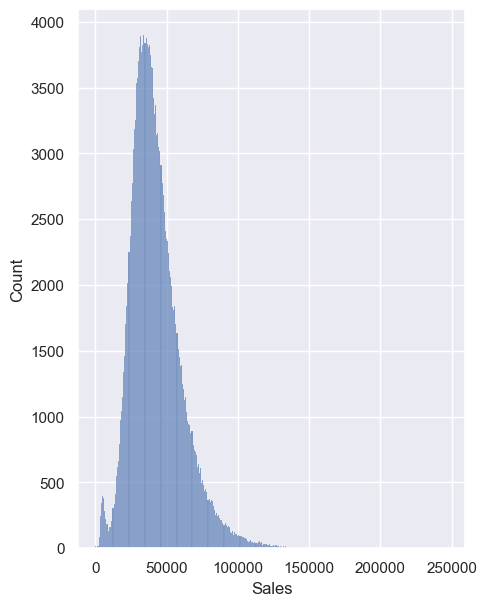

In [16]:
sns.histplot(data=master_df, x='Sales')

<Axes: xlabel='#Order', ylabel='Count'>

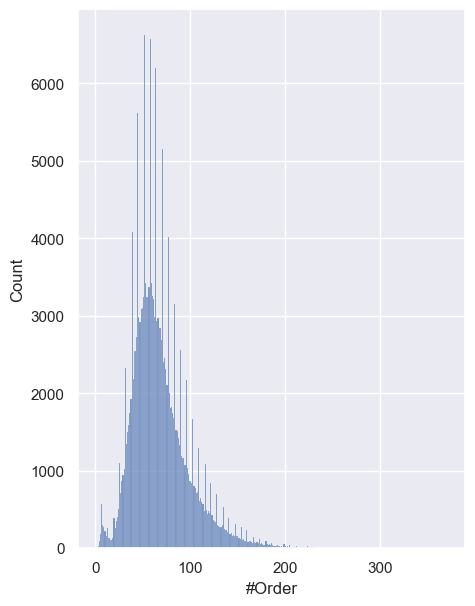

In [17]:
sns.histplot(data=master_df, x='#Order')

In [11]:
def compute_distribution(df, col):
    
    """
    Utility function to check data distribution for numerical features.
    
    mean >  median : Positive (Right) Skewed
    mean <  median : Negative (Left) Skewed
    mean == median : Normal
    
    skew in range (-0.5, 0.5) = approximately symmetrical (Normal distribution)
    skew in range (-1, 1) = moderately skewed
    skew > 1 or skew < -1 = highly skewed
    
    kurtosis > 3 : Leptokurtic
    kurtosis == 3: Mesokurtic
    kurtosis < 3: Platykurtic
    
    :param df: pandas dataframe 
    :param col: selected numerical feature (string)
    :return: type of distribution (string)
    """
    
    mean = df[col].mean()
    median = df[col].median()
    
    skew_score = df[col].skew()
    kurtosis_score = df[col].kurtosis()
    
    if (skew_score > -0.5) and (skew_score < 0.5):
        skewness = 'Approximately Symmetric'
    elif (skew_score > -1) and (skew_score < 1):
        skewness = 'Moderately Skewed'
    else:
        skewness = 'Highly Skewed'
        
    if kurtosis_score > 3:
        kurtosis_flag = 'Leptokurtic'
    elif kurtosis_score == 3:
        kurtosis_flag = 'Mesokurtic'
    else:
        kurtosis_flag = 'Platykurtic'
    
    if mean < median:

        print(f'{col} data distribution: Left Skewed Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')
    
    elif mean > median:

        print(f'{col} data distribution: Right Skewed Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')
    
    else:

        print(f'{col} data distribution: Normal Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')

In [12]:
compute_distribution(master_df, col='Sales')
compute_distribution(master_df, col='#Order')

Sales data distribution: Right Skewed Distribution
Skewness score: 1.25 [Highly Skewed]
Kurtosis score: 3.49 [Leptokurtic]
#Order data distribution: Right Skewed Distribution
Skewness score: 1.37 [Highly Skewed]
Kurtosis score: 3.68 [Leptokurtic]


In [22]:
def outlier_handler(df, col):
    
    """
    Utility function to clean outlier using Tukey Fences Method.
    :param df: Dataframe with outlier (pd.DataFrame)
    :param col: Numerical Feature (String)
    :return: Dataframe without outlier (pd.DataFrame)
    """

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%')

    no_outlier = df[(df[col] >= low_bound) & (df[col] <= up_bound)]

    return no_outlier

In [23]:
df_clean = master_df.copy()
df_clean = outlier_handler(df_clean, col='Sales')
df_clean = outlier_handler(df_clean, col='#Order')

Percentage of outliers: 3.10%
Percentage of outliers: 2.01%


<Axes: xlabel='Sales', ylabel='Count'>

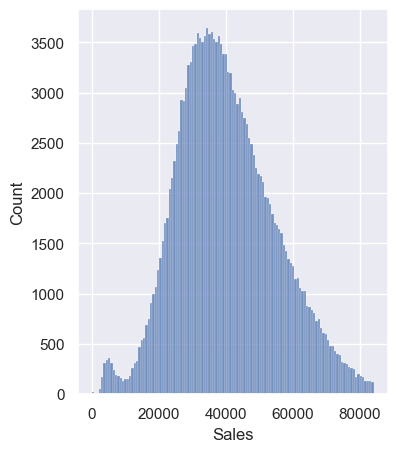

In [24]:
sns.histplot(data=df_clean, x='Sales')

<Axes: xlabel='#Order', ylabel='Count'>

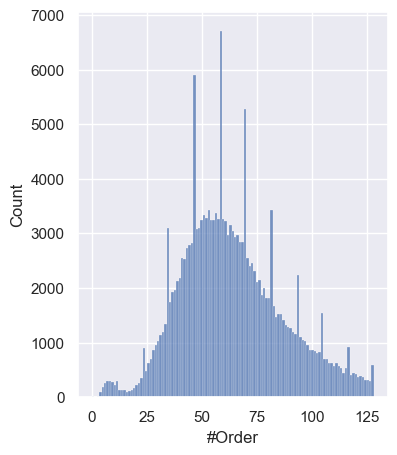

In [25]:
sns.histplot(data=df_clean, x='#Order')

In [15]:
compute_distribution(df_clean, col='Sales')
compute_distribution(df_clean, col='#Order')

Sales data distribution: Right Skewed Distribution
Skewness score: 0.34 [Approximately Symmetric]
Kurtosis score: -0.06 [Platykurtic]
#Order data distribution: Right Skewed Distribution
Skewness score: 0.41 [Approximately Symmetric]
Kurtosis score: -0.06 [Platykurtic]


<Axes: ylabel='Frequency'>

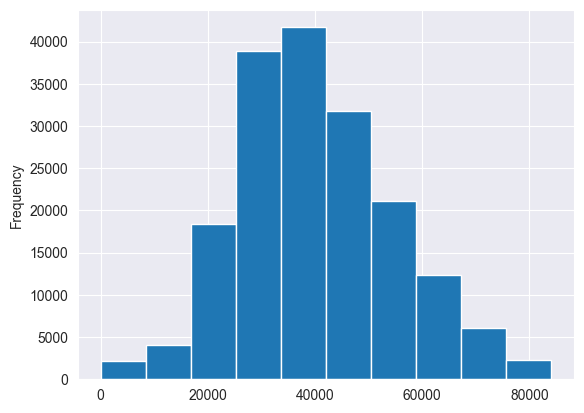

In [16]:
df_clean['Sales'].plot(kind='hist')

<Axes: ylabel='Frequency'>

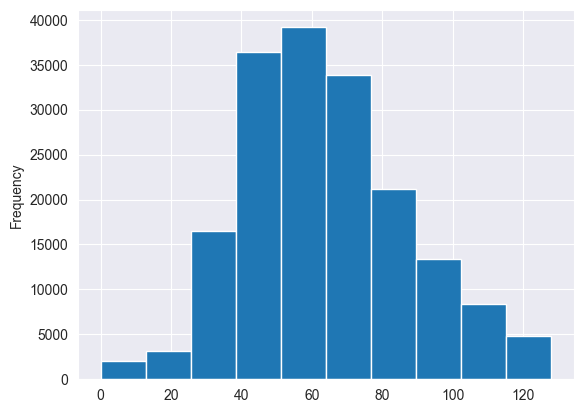

In [17]:
df_clean['#Order'].plot(kind='hist')

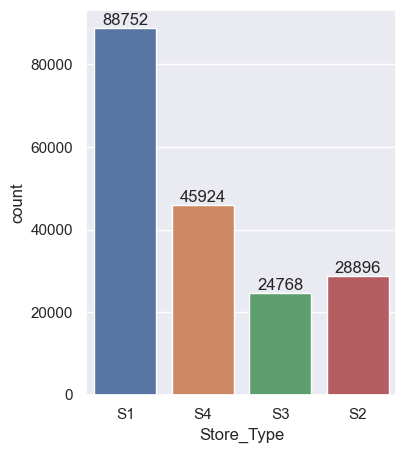

In [26]:
ax = sns.countplot(data=master_df, x="Store_Type")
for cont in ax.containers:
    ax.bar_label(cont)

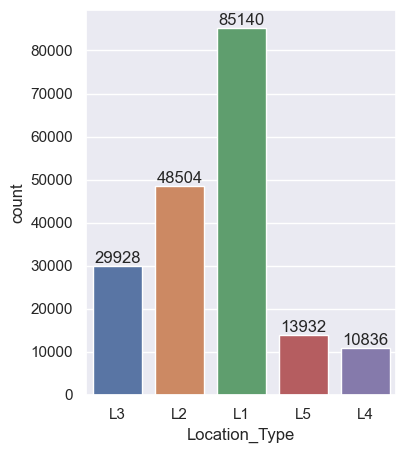

In [27]:
ax = sns.countplot(data=master_df, x="Location_Type")
for cont in ax.containers:
    ax.bar_label(cont)

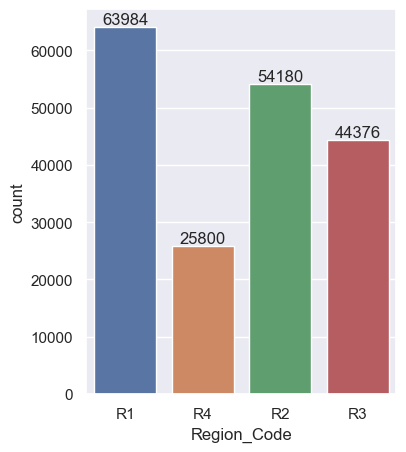

In [28]:
ax = sns.countplot(data=master_df, x="Region_Code")
for cont in ax.containers:
    ax.bar_label(cont)

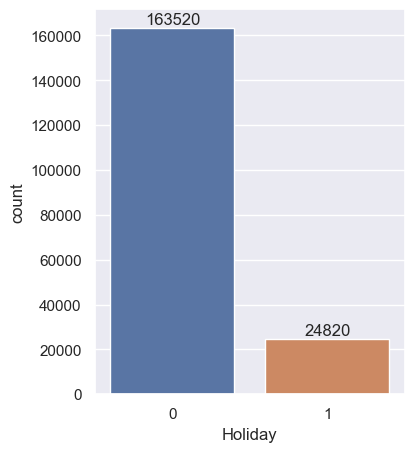

In [29]:
ax = sns.countplot(data=master_df, x="Holiday")
for cont in ax.containers:
    ax.bar_label(cont)

# Multivariate Analysis

## Feature Association

#### Sales Vs #Order analysis

<Axes: xlabel='#Order', ylabel='Sales'>

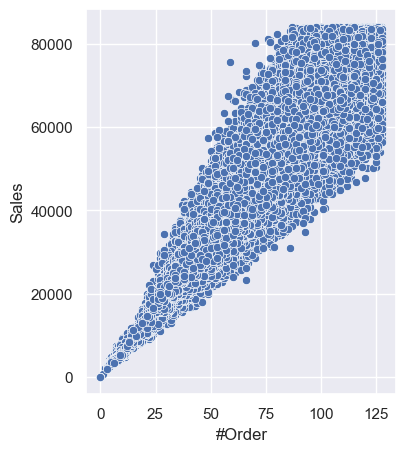

In [31]:
sns.scatterplot(data=df_clean, x='#Order', y='Sales')

Sales and #Order has a strong positive linear relationships. If #Order increase then Sales will increase as well. Pretty obvious.

#### Location Vs Sales Analysis

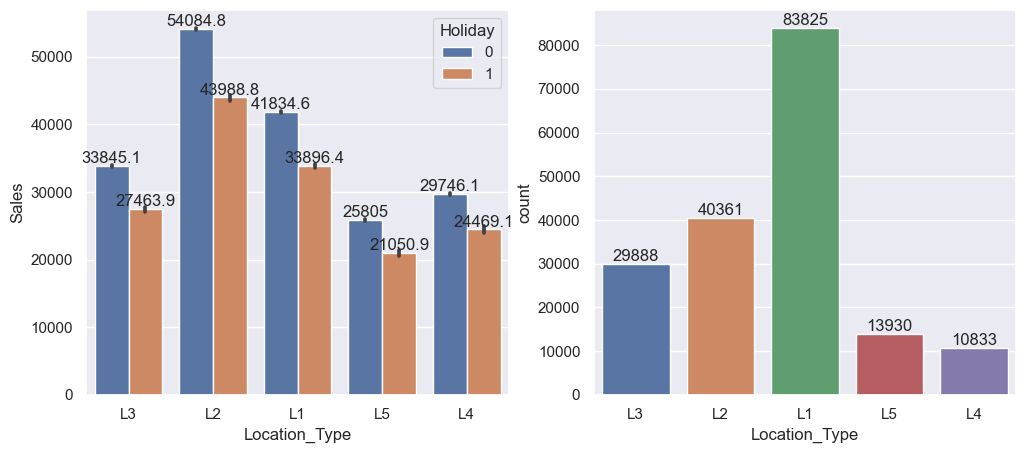

In [32]:
sns.set()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax1 = sns.barplot(data=df_clean, x="Location_Type", y='Sales', hue='Holiday', ax=axes[0])
for cont in ax1.containers:
    ax1.bar_label(cont)

ax2 = sns.countplot(data=df_clean, x="Location_Type", ax=axes[1])
for cont in ax2.containers:
    ax2.bar_label(cont)

Location type certainly give an impact on sales. Even though L1 has the largest number of store, L2 has the biggest sales on holiday and weekday.

#### Region Vs Sales Analysis

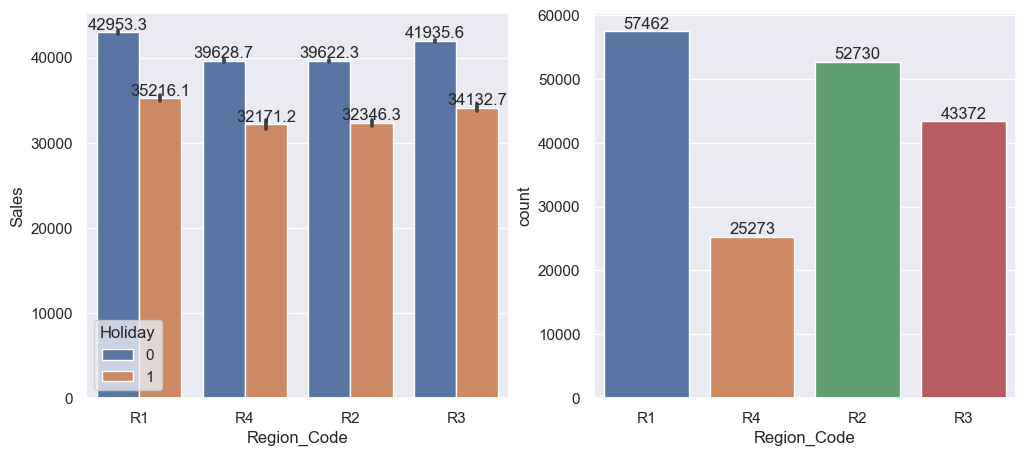

In [33]:
sns.set()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax1 = sns.barplot(data=df_clean, x="Region_Code", y='Sales', hue='Holiday', ax=axes[0])
for cont in ax1.containers:
    ax1.bar_label(cont)

ax2 = sns.countplot(data=df_clean, x="Region_Code", ax=axes[1])
for cont in ax2.containers:
    ax2.bar_label(cont)

Number of revenue from each region gives almost similar number to the company. R4 region has the smallest number of store, but contribute sales as much as the region that has the largest number of store.

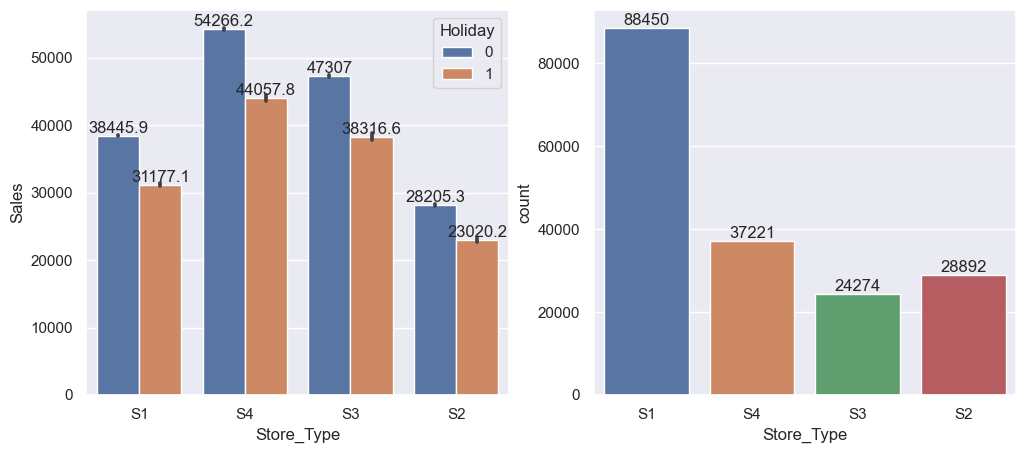

In [34]:
sns.set()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax1 = sns.barplot(data=df_clean, x="Store_Type", y='Sales', hue='Holiday', ax=axes[0])
for cont in ax1.containers:
    ax1.bar_label(cont)

ax2 = sns.countplot(data=df_clean, x="Store_Type", ax=axes[1])
for cont in ax2.containers:
    ax2.bar_label(cont)

Store_Type S4 contribute the highest revenue, on top of that S3 is in the second position even though it has the smallest number of store. Lets deep dive,

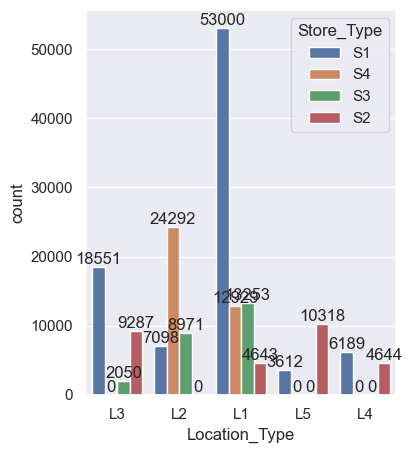

In [36]:
ax1 = sns.countplot(data=df_clean, x="Location_Type", hue='Store_Type')
for cont in ax1.containers:
    ax1.bar_label(cont)

Now we had the answer why L2 contribute the highest revenue, because L2 has the number of S4 store type.

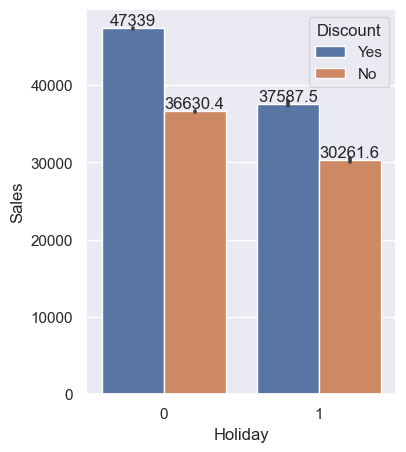

In [37]:
ax1 = sns.barplot(data=df_clean, x="Holiday", y='Sales', hue='Discount')
for cont in ax1.containers:
    ax1.bar_label(cont)

Discount can boost sales on any day and number of sales between holiday and not holiday has no big differences.

## Correlation Analysis
### Spearman's Correlation

Most of the categorical features have more than 2 unique values and not ordinal. We are using <u>frequency encoding</u><sup>1</sup> instead of onehot encoding to avoid large number of features produced by onehot encoding. For correlation analysis, we are using <u>Spearman</u><sup>2</sup> method because more robust for categorical vs numerical features.

Source: 
1. https://link.springer.com/referenceworkentry/10.1007/978-0-387-32833-1_379
2. https://link.springer.com/article/10.1007/s00180-022-01207-6

<Axes: >

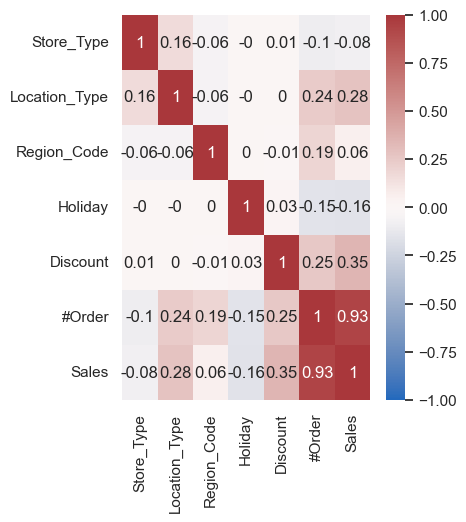

In [38]:
df_clean_enc = df_clean.copy()
cats = ['Store_id', 'Region_Code', 'Location_Type', 'Store_Type']
for cat in cats:
    df_clean_enc.loc[:, cat] = df_clean_enc[cat].map(df_clean_enc.groupby(cat).size()/len(df_clean_enc))
df_clean_enc['Discount'] = df_clean_enc['Discount'].apply(lambda val: 0 if val == 'No' else 1)

corr = df_clean_enc.corr(method='spearman').round(2)
corr.drop('Store_id', inplace=True)
corr.drop('Store_id', axis=1, inplace=True)

sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

Discount and Location_Type has quite strong positive relationship with Sales for categorical vs numerical features. And very strong relationship between #Order and Sales.
The correlation analysis is not the best tools to measure relationship between categorical features. Instead, we used <u>Chi-Squared Test of Independence</u><sup>1</sup> to determine whether there is a significant association between two categorical variables.

Source: https://www.researchgate.net/publication/253336860_The_Chi-square_test_of_independence

### Chi-Squared Test of Independence

In [29]:
def chi_squared_test(df, cat1, cat2):
    
    """
    Conducting a Chi-Squared Hypothesis Test.
    :param df: 
    :param cat1: 
    :param cat2: 
    :return: 
    """
    print(f'{cat1} and {cat2}')
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    res = stats.chi2_contingency(contingency_table)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(res.pvalue))
    if res.pvalue <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print('--------------------------------------')
    print('\n')

In [30]:
print('--------------------------------------')
chi_squared_test(df_clean_enc, cat1='Holiday', cat2='Location_Type')
print('--------------------------------------')
chi_squared_test(df_clean_enc, cat1='Holiday', cat2='Region_Code')
print('--------------------------------------')
chi_squared_test(df_clean_enc, cat1='Holiday', cat2='Store_Type')
print('--------------------------------------')
chi_squared_test(df_clean_enc, cat1='Discount', cat2='Location_Type')
print('--------------------------------------')
chi_squared_test(df_clean_enc, cat1='Discount', cat2='Region_Code')
print('--------------------------------------')
chi_squared_test(df_clean_enc, cat1='Discount', cat2='Store_Type')
print('--------------------------------------')
chi_squared_test(df_clean_enc, cat1='Location_Type', cat2='Store_Type')

--------------------------------------
Holiday and Location_Type
p value is 0.0003556007138319383
Dependent (reject H0)
--------------------------------------


--------------------------------------
Holiday and Region_Code
p value is 0.15162395835692682
Independent (H0 holds true)
--------------------------------------


--------------------------------------
Holiday and Store_Type
p value is 2.960501777518711e-06
Dependent (reject H0)
--------------------------------------


--------------------------------------
Discount and Location_Type
p value is 3.329623840186425e-37
Dependent (reject H0)
--------------------------------------


--------------------------------------
Discount and Region_Code
p value is 2.3102505143469212e-05
Dependent (reject H0)
--------------------------------------


--------------------------------------
Discount and Store_Type
p value is 3.270144649366644e-49
Dependent (reject H0)
--------------------------------------


------------------------------------

After conducting the test, only Holiday and Region_Code fail to reject null hypothesis which means there is no significant association between Holiday and Region_Code.

### Analysis of Variance

In [31]:
def compute_anova(df, groups, obs, values):
    
    pivot_df = pd.pivot_table(df, values=values, index=groups, columns=obs, aggfunc=sum).fillna(0)
    num_of_groups = len(pivot_df.columns)
    f_value, p_value = stats.f_oneway(*pivot_df.iloc[:-1,0:num_of_groups].T.values)
    
    if p_value < 0.05:
        print(f"{values} among {obs}'s {len(df[obs].unique())} categories are significantly different")
    else:
        print(f"{values} among {obs}'s {len(df[obs].unique())} categories are not significantly difference")

In [32]:
compute_anova(df_clean, groups='Store_id', obs='Discount', values='Sales')
compute_anova(df_clean, groups='Store_id', obs='Holiday', values='Sales')
compute_anova(df_clean, groups='Store_id', obs='Region_Code', values='Sales')
compute_anova(df_clean, groups='Store_id', obs='Location_Type', values='Sales')

Sales among Discount's 2 categories are not significantly difference
Sales among Holiday's 2 categories are significantly different
Sales among Region_Code's 4 categories are significantly different
Sales among Location_Type's 5 categories are significantly different


# Business Insight

1. Store type gives significant impact on number of sales.
2. Discount can boost sales on any day. 
3. Based on number of sales, S4 is the best store type.

# Recommendation

To increase Sales from each location, create more S4 and S3 store type on each location and closed some under perform store type such as S1 on L1 location which has too much retailer for this type.

# Author

[Muhammad Mirza Fahmi](https://www.linkedin.com/in/mmirzafahmi)
Senior Data Engineer at Good Doctor Technology | Data Science Instructor at Rakamin Academy